<a href="https://colab.research.google.com/github/avnisinngh/Numpy-Learning/blob/main/Brain_Tumor_using__cnn_unnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Clone the repository
!git clone https://github.com/emgerber88/brain_tumor_CNN_classifier.git

# Show the current working directory and repository path
import os

# Get the current working directory
current_path = os.getcwd()
print(f"Current working directory: {current_path}")

# Show the repository path
repo_path = "/content/brain_tumor_CNN_classifier"
print(f"Repository path: {repo_path}")

# Verify the repository exists
if os.path.exists(repo_path):
    print("✅ Repository successfully cloned!")

    # List all files in the repository
    print("\n📁 Files in the repository:")
    !ls -la "{repo_path}"
else:
    print("❌ Repository not found!")

Cloning into 'brain_tumor_CNN_classifier'...
remote: Enumerating objects: 8011, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 8011 (delta 42), reused 91 (delta 41), pack-reused 7918 (from 1)
Receiving objects: 100% (8011/8011), 199.67 MiB | 31.16 MiB/s, done.
Resolving deltas: 100% (43/43), done.
Updating files: 100% (8208/8208), done.
Current working directory: /content/brain_tumor_CNN/brain_tumor_CNN_classifier
Repository path: /content/brain_tumor_CNN_classifier
❌ Repository not found!


In [11]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [21]:
# Set the path to the dataset
dataset_path = "/content/brain_tumor_CNN/brain_tumor_CNN_classifier/data/"

# Define the training and testing directories
train_dir = os.path.join(dataset_path, "/content/brain_tumor_CNN/brain_tumor_CNN_classifier/data/Training/")
test_dir = os.path.join(dataset_path, "/content/brain_tumor_CNN/brain_tumor_CNN_classifier/data/Testing/")

# Define the categories
categories = ["glioma", "meningioma", "notumor","other", "pituitary"]

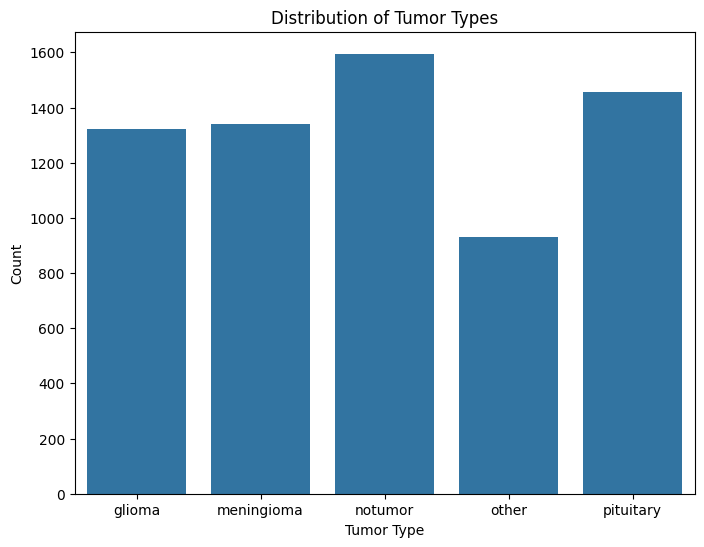

In [22]:
# Load and preprocess the dataset
train_data = []
for category in categories:
    folder_path = os.path.join(train_dir, category)
    images = os.listdir(folder_path)
    count = len(images)
    train_data.append(pd.DataFrame({"Image": images, "Category": [category] * count, "Count": [count] * count}))

train_df = pd.concat(train_data, ignore_index=True)

# Visualize the distribution of tumor types in the training dataset
plt.figure(figsize=(8, 6))
sns.barplot(data=train_df, x="Category", y="Count")
plt.title("Distribution of Tumor Types")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.show()

Number of categories: 5


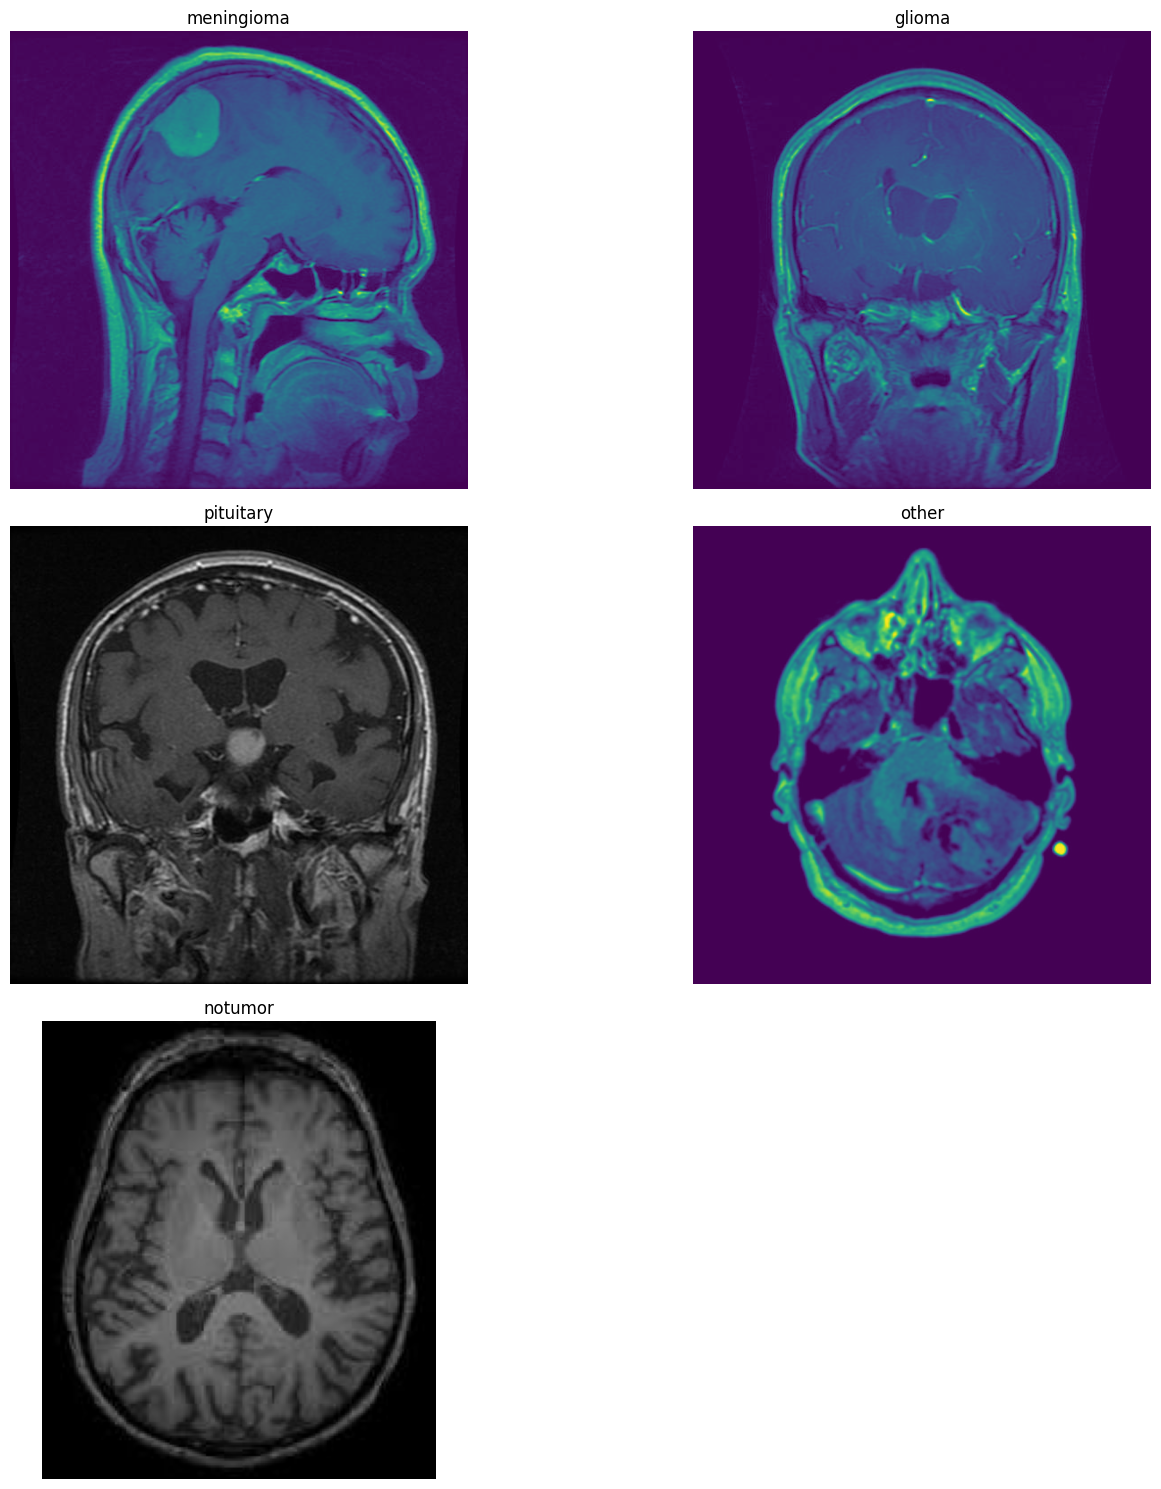

In [24]:

# Get the categories
data_dir = '/content/brain_tumor_CNN/brain_tumor_CNN_classifier/data/Training/'  # Adjust path if needed
categories = os.listdir(data_dir)
num_categories = len(categories)

print(f"Number of categories: {num_categories}")

# Create appropriate grid size
rows = (num_categories + 1) // 2  # Calculate rows needed
cols = 2  # You can adjust columns as needed

plt.figure(figsize=(15, 5 * rows))  # Adjust figure size dynamically

for i, category in enumerate(categories):
    folder_path = os.path.join(data_dir, category)
    if os.path.isdir(folder_path) and os.listdir(folder_path):
        image_path = os.path.join(folder_path, os.listdir(folder_path)[0])
        img = plt.imread(image_path)
        plt.subplot(rows, cols, i+1)
        plt.imshow(img)
        plt.title(category)
        plt.axis('off')

plt.tight_layout()
plt.show()

In [25]:
# Set the image size
image_size = (150, 150)

# Set the batch size for training
batch_size = 32

# Set the number of epochs for training
epochs = 50

In [26]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 6642 images belonging to 5 classes.
Found 1557 images belonging to 5 classes.


In [27]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(len(categories), activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 410s 2s/step - accuracy: 0.3888 - loss: 1.3768 - val_accuracy: 0.4727 - val_loss: 1.3932
Epoch 2/50
  1/207 ━━━━━━━━━━━━━━━━━━━━ 5:35 2s/step - accuracy: 0.4375 - loss: 1.4386

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


207/207 ━━━━━━━━━━━━━━━━━━━━ 31s 144ms/step - accuracy: 0.4375 - loss: 1.4386 - val_accuracy: 0.4408 - val_loss: 1.5440
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 440s 2s/step - accuracy: 0.6339 - loss: 0.9289 - val_accuracy: 0.6022 - val_loss: 1.1674
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 42s 199ms/step - accuracy: 0.6250 - loss: 0.9316 - val_accuracy: 0.6003 - val_loss: 1.1517
Epoch 5/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 403s 2s/step - accuracy: 0.7153 - loss: 0.7570 - val_accuracy: 0.6680 - val_loss: 0.8852
Epoch 6/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 42s 196ms/step - accuracy: 0.8438 - loss: 0.5637 - val_accuracy: 0.6536 - val_loss: 0.9724
Epoch 7/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 442s 2s/step - accuracy: 0.7492 - loss: 0.6566 - val_accuracy: 0.7253 - val_loss: 0.8031
Epoch 8/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 40s 188ms/step - accuracy: 0.8438 - loss: 0.5197 - val_accuracy: 0.7109 - val_loss: 0.8728
Epoch 9/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 423s 2s/step - accuracy: 0.7998 - loss: 0.5595 - val_accurac

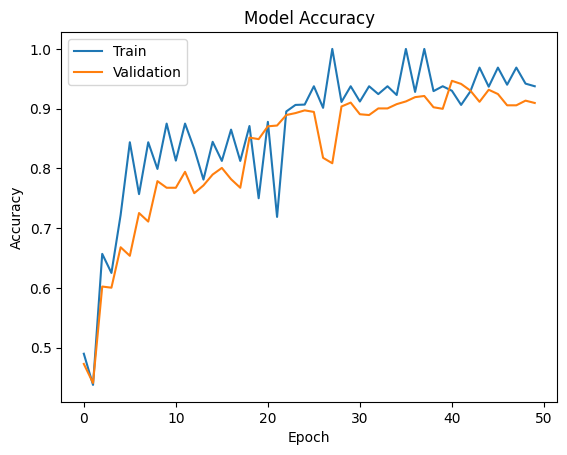

In [29]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

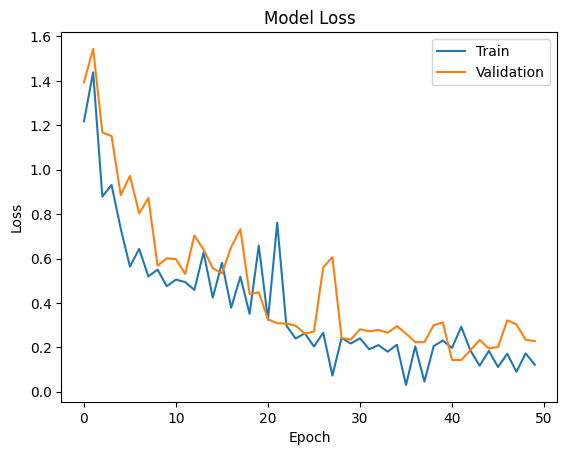

In [30]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [31]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 25s 513ms/step - accuracy: 0.8731 - loss: 0.3113
Test Loss: 0.2279239445924759
Test Accuracy: 0.9095051884651184


49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 777ms/step


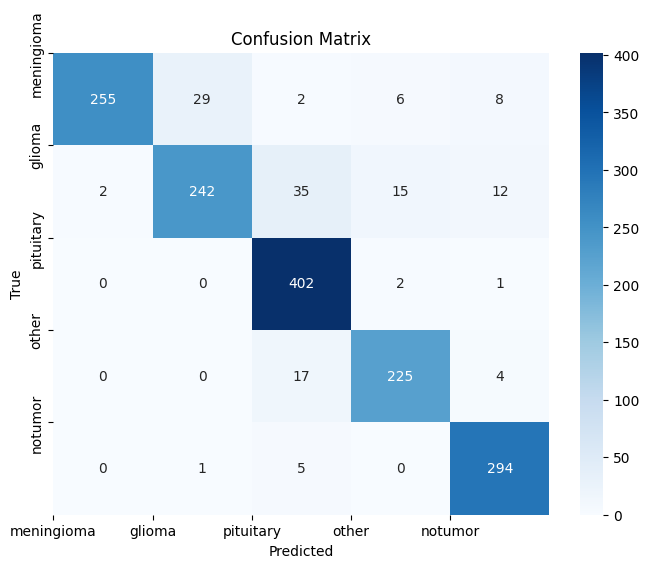

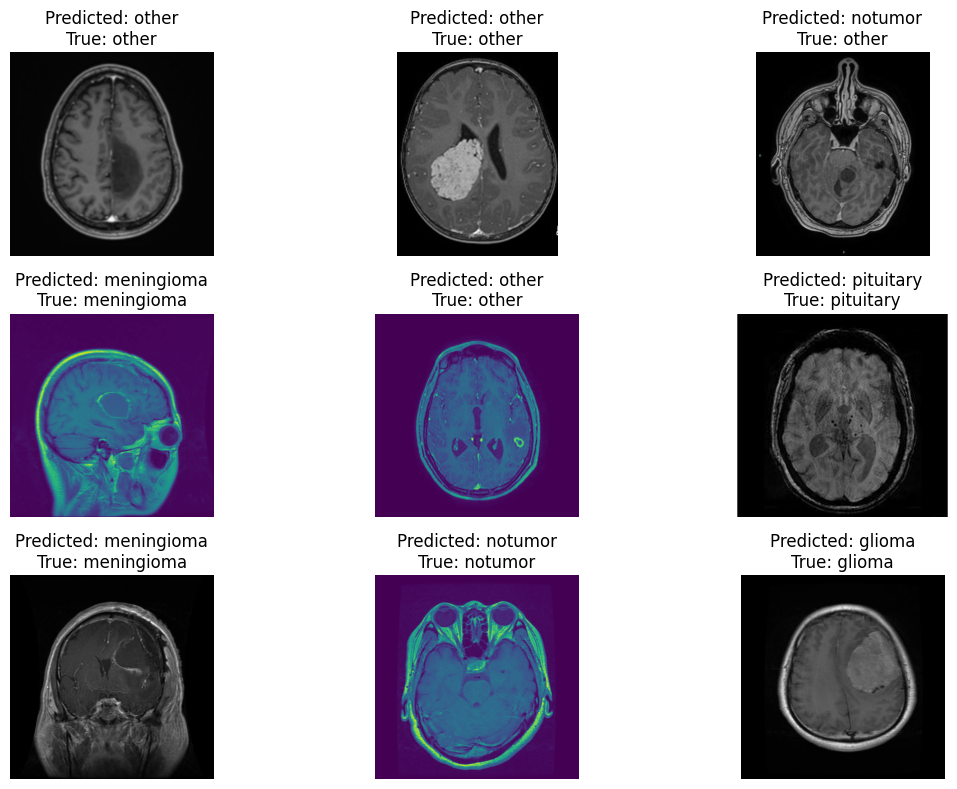

In [32]:
# Make predictions on the test dataset
predictions = model.predict(test_generator)
predicted_categories = np.argmax(predictions, axis=1)
true_categories = test_generator.classes

# Create a confusion matrix
confusion_matrix = tf.math.confusion_matrix(true_categories, predicted_categories)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(len(categories)), labels=categories)
plt.yticks(ticks=np.arange(len(categories)), labels=categories)
plt.show()

# Plot sample images with their predicted and true labels
test_images = test_generator.filenames
sample_indices = np.random.choice(range(len(test_images)), size=9, replace=False)
sample_images = [test_images[i] for i in sample_indices]
sample_predictions = [categories[predicted_categories[i]] for i in sample_indices]
sample_true_labels = [categories[true_categories[i]] for i in sample_indices]

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(test_dir, sample_images[i]))
    plt.imshow(img)
    plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

Class: meningioma
Precision: 0.9922178988326849
Recall: 0.85
F1-Score: 0.9156193895870736

Class: glioma
Precision: 0.8897058823529411
Recall: 0.7908496732026143
F1-Score: 0.8373702422145328

Class: pituitary
Precision: 0.8720173535791758
Recall: 0.9925925925925926
F1-Score: 0.9284064665127021

Class: other
Precision: 0.907258064516129
Recall: 0.9146341463414634
F1-Score: 0.9109311740890689

Class: notumor
Precision: 0.9216300940438872
Recall: 0.98
F1-Score: 0.949919224555735



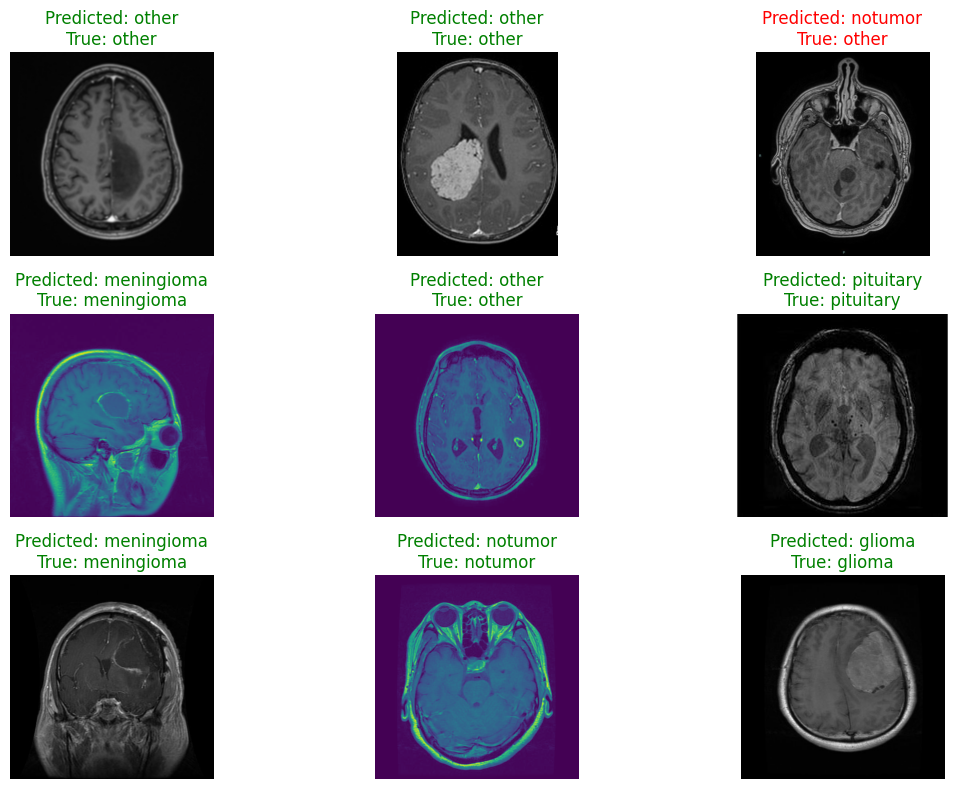

In [33]:
# Calculate precision, recall, and F1-score from the confusion matrix
precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print precision, recall, and F1-score for each class
for i, category in enumerate(categories):
    print(f"Class: {category}")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1-Score: {f1_score[i]}")
    print()

# Analyze the sample images and their predictions
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(test_dir, sample_images[i]))
    plt.imshow(img)
    if sample_predictions[i] == sample_true_labels[i]:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='green')
    else:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='red')
    plt.axis("off")
plt.tight_layout()
plt.show()

In [34]:
# Save the trained model
model.save("brain_tumor_detection_model.h5")